In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
real = pd.read_csv('../ai_medreview/data/real_gp_reviews_processed.csv')
fake = pd.read_csv('../ai_medreview/data/fake_gp_reviews_all_processed.csv')

In [4]:
real.head(2)

,free_text,sentiment_free_text,sentiment_score_free_text,free_text_len,rating_score,feedback_labels,emotion_free_text,label,abs_sentiment
0,PERSON was amazing kind and helpful The recept...,positive,0.937987,23.0,4.0,Reception Staff Interaction,admiration,0,0.937987
1,We have had Very good service from the NHS reg...,positive,0.971078,22.0,5.0,Treatment Quality,joy,0,0.971078


In [5]:
fake.head(2)

,free_text,generation_category,free_text_len,sentiment_free_text,sentiment_score_free_text,feedback_labels,emotion_free_text,label,abs_sentiment,rating
0,The staff were very helpful and kind.\n\nI rec...,Patient Respect,246,positive,0.959466,Reception Staff Interaction,disappointment,1,0.959466,3
1,The staff were friendly but forgot my appointm...,Patient Respect,933,negative,0.878586,Communication Effectiveness,disappointment,1,-0.878586,4


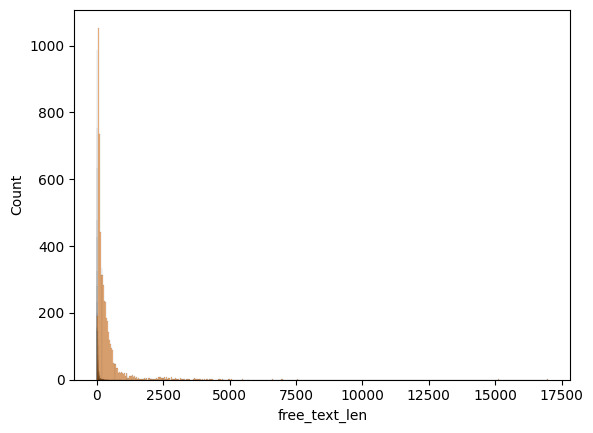

In [8]:
sns.histplot(real['free_text_len'], alpha=0.5)
sns.histplot(fake['free_text_len'], alpha=0.5)
plt.show()

In [9]:
fake = fake[fake['free_text_len'] < 7500]

In [10]:
fake.shape

(5802, 10)

In [11]:
real = real[real['free_text_len']< 7500]

In [12]:
real.shape

(6169, 9)

<Axes: xlabel='abs_sentiment', ylabel='Count'>

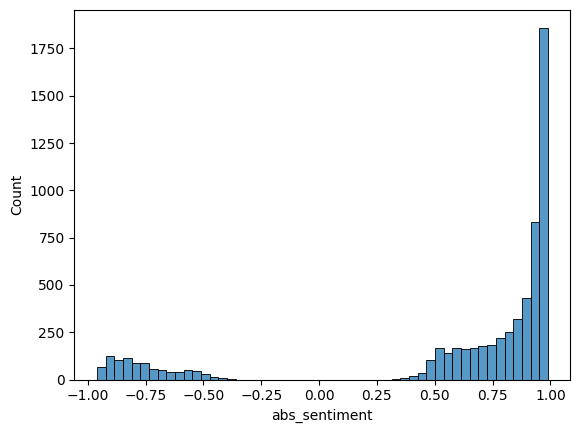

In [13]:
sns.histplot(real['abs_sentiment'])

<Axes: xlabel='abs_sentiment', ylabel='Count'>

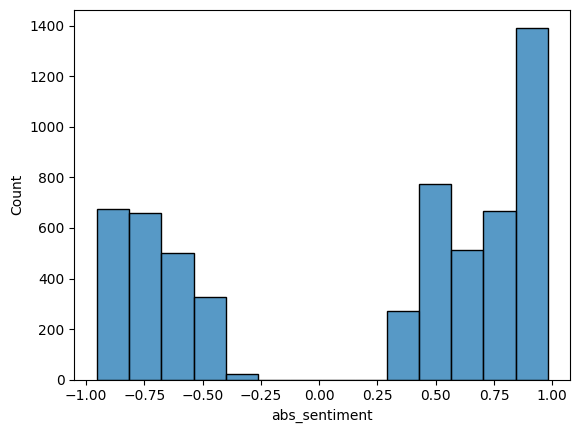

In [14]:
sns.histplot(fake['abs_sentiment'])

In [15]:
fake.head(20)

,free_text,generation_category,free_text_len,sentiment_free_text,sentiment_score_free_text,feedback_labels,emotion_free_text,label,abs_sentiment,rating
0,The staff were very helpful and kind.\n\nI rec...,Patient Respect,246,positive,0.959466,Reception Staff Interaction,disappointment,1,0.959466,3
1,The staff were friendly but forgot my appointm...,Patient Respect,933,negative,0.878586,Communication Effectiveness,disappointment,1,-0.878586,4
2,The staff were kind but the wait was long. The...,Patient Respect,53,positive,0.910060,Reception Staff Interaction,admiration,1,0.910060,4
3,The GP was very understanding of my concerns b...,Patient Respect,86,positive,0.602609,Environment and Ambiance,approval,1,0.602609,4
4,I found the GP surgery to be thoroughly disorg...,Patient Respect,105,negative,0.866430,Patient Respect,disappointment,1,-0.866430,4
5,The reception staff were friendly and welcomin...,Patient Respect,102,neutral,0.472647,Reception Staff Interaction,approval,1,0.472647,4
6,"The staff were very helpful and kind, making m...",Patient Respect,66,positive,0.977641,Staff Professionalism,admiration,1,0.977641,4
7,"The staff were friendly and attentive, but the...",Patient Respect,444,negative,0.533943,Patient Respect,disappointment,1,-0.533943,3
8,The reception staff were friendly and welcomin...,Patient Respect,231,positive,0.885914,Staff Empathy and Compassion,disappointment,1,0.885914,4
9,The staff were friendly and helpful during my ...,Patient Respect,118,negative,0.588034,Communication Effectiveness,disappointment,1,-0.588034,2


In [24]:
score_list = []

for _, row in tqdm(real.iterrows(), "neutral", total=real.shape[0]):
    sent_name = row['sentiment_free_text']
    score = row['abs_sentiment']
    if sent_name == 'neutral':
        score_list.append(0.0)
    else:
        score_list.append(score)

real['abs_score_fixed'] = score_list

neutral: 100%|██████████████████████████████████████████████| 6169/6169 [00:00<00:00, 48106.33it/s]


In [21]:
fake.head(2)

,free_text,generation_category,free_text_len,sentiment_free_text,sentiment_score_free_text,feedback_labels,emotion_free_text,label,abs_sentiment,rating,abs_score_fixed
0,The staff were very helpful and kind.\n\nI rec...,Patient Respect,246,positive,0.959466,Reception Staff Interaction,disappointment,1,0.959466,3,0.959466
1,The staff were friendly but forgot my appointm...,Patient Respect,933,negative,0.878586,Communication Effectiveness,disappointment,1,-0.878586,4,-0.878586


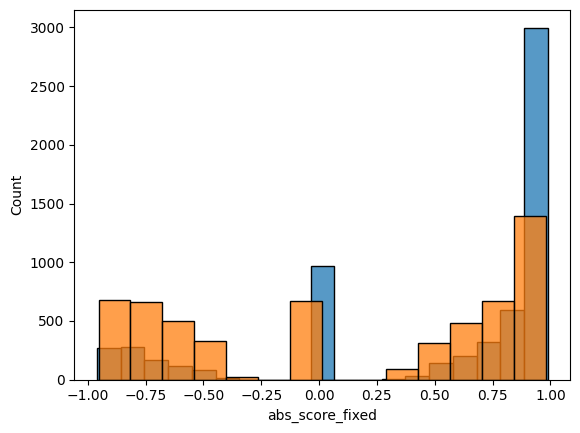

In [25]:
sns.histplot(real['abs_score_fixed'])
sns.histplot(fake['abs_score_fixed'])
plt.show()